In [ ]:
!pip install tests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement tests (from versions: none)
ERROR: No matching distribution found for tests


In [ ]:
# Import our libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
import tests as t

# Read in our dataset
df = pd.read_table('SMSSpamCollection',
                   sep='\t',
                   header=None,
                   names=['label', 'sms_message'])

# Fix our response value
df['label'] = df.label.map({'ham':0, 'spam':1})


In [ ]:
# Split our dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(df['sms_message'],
                                                    df['label'],
                                                    random_state=1)
# Instantiate the CountVectorizer method
count_vector = CountVectorizer()

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = count_vector.transform(X_test)

# Instantiate a number of our models
naive_bayes = MultinomialNB()
bag_mod = BaggingClassifier(n_estimators=200)
rf_mod = RandomForestClassifier(n_estimators=200)
ada_mod = AdaBoostClassifier(n_estimators=300, learning_rate=0.2)
svm_mod = SVC(probability=True)

In [ ]:
# Fit each of the 4 models
# This might take some time to run
naive_bayes.fit(training_data, y_train)
bag_mod.fit(training_data, y_train)
rf_mod.fit(training_data, y_train)

ada_mod.fit(training_data, y_train)
svm_mod.fit(training_data, y_train)

SVC(probability=True)

In [ ]:
# The models you fit above were fit on which data?

a = 'X_train'
b = 'X_test'
c = 'y_train'
d = 'y_test'
e = 'training_data'
f = 'testing_data'

# Change models_fit_on to only contain the correct string names
# of values that you oassed to the above models

models_fit_on = {c, e} # update this to only contain correct letters

# Checks your solution - don't change this
t.test_one(models_fit_on)

That's right!  You need to fit on both parts of the data pertaining to training data!


In [ ]:
# Make predictions using each of your models
preds_nb = naive_bayes.predict(testing_data)
bag_predications = bag_mod.predict(testing_data)
rf_predications = rf_mod.predict(testing_data)
ada_predications = ada_mod.predict(testing_data)
svm_predications = svm_mod.predict(testing_data)

In [ ]:
# accuracy is the total correct divided by the total to predict
def accuracy(actual, preds):
    '''
    INPUT
    preds - predictions as a numpy array or pandas series
    actual - actual values as a numpy array or pandas series

    OUTPUT:
    returns the accuracy as a float
    '''
    return np.sum(preds == actual)/len(actual)


print(accuracy(y_test, preds_nb),'naives_bayes')
print(accuracy_score(y_test, preds_nb),'naives_bayes')

print(accuracy(y_test, bag_predications), 'bag predications')
print(accuracy_score(y_test, bag_predications), 'bag predications')

print(accuracy(y_test, rf_predications),'rf_predications')
print(accuracy_score(y_test, rf_predications),'rf_predications')

print(accuracy(y_test, ada_predications),'ada')
print(accuracy_score(y_test, ada_predications),'ada')

print(accuracy(y_test, svm_predications),'svm')
print(accuracy_score(y_test, svm_predications),'svm')

0.9885139985642498 naives_bayes
0.9885139985642498 naives_bayes
0.9755922469490309 bag predications
0.9755922469490309 bag predications
0.9834888729361091 rf_predications
0.9834888729361091 rf_predications
0.9770279971284996 ada
0.9770279971284996 ada
0.9849246231155779 svm
0.9849246231155779 svm


In [ ]:
# precision is the true positives over the predicted positive values
def precision(actual, preds):
    '''
    INPUT
    (assumes positive = 1 and negative = 0)
    preds - predictions as a numpy array or pandas series
    actual - actual values as a numpy array or pandas series

    OUTPUT:
    returns the precision as a float
    '''
    tp = len(np.intersect1d(np.where(preds==1), np.where(actual==1)))
    pred_pos =(preds ==1).sum()
    return   tp/(pred_pos)

print(precision(y_test, preds_nb),'naives_bayes')
print(precision_score(y_test, preds_nb),'naives_bayes')

print(precision(y_test, bag_predications), 'bag predications')
print(precision_score(y_test, bag_predications), 'bag predications')

print(precision(y_test, rf_predications),'rf_predications')
print(precision_score(y_test, rf_predications),'rf_predications')


print(precision(y_test, ada_predications),'ada')
print(precision_score(y_test, ada_predications),'ada')

print(precision(y_test, svm_predications),'svm')
print(precision_score(y_test, svm_predications),'svm')

0.9720670391061452 naives_bayes
0.9720670391061452 naives_bayes
0.9217877094972067 bag predications
0.9217877094972067 bag predications
1.0 rf_predications
1.0 rf_predications
0.9693251533742331 ada
0.9693251533742331 ada
0.9939759036144579 svm
0.9939759036144579 svm


In [ ]:
# recall is true positives over all actual positive values
def recall(actual, preds):
    '''
    INPUT
    preds - predictions as a numpy array or pandas series
    actual - actual values as a numpy array or pandas series

    OUTPUT:
    returns the recall as a float
    '''
    tp = len(np.intersect1d(np.where(preds==1), np.where(actual==1)))
    pred_neg = len(np.intersect1d(np.where(preds==0), np.where(actual==1)))
    return tp/(tp+pred_neg) # calculate recall here


print(recall(y_test, preds_nb),'naives_bayes')
print(recall_score(y_test, preds_nb),'naives_bayes')

print("If the above match, you got it!")
print(recall(y_test, bag_predications), 'bag predications')
print(recall_score(y_test, bag_predications), 'bag predications')

print(recall(y_test, rf_predications),'rf_predications')
print(recall_score(y_test, rf_predications),'rf_predications')

print(recall(y_test, ada_predications),'ada')
print(recall_score(y_test, ada_predications),'ada')

print(recall(y_test, svm_predications),'svm')
print(recall_score(y_test, svm_predications),'svm')

0.9405405405405406 naives_bayes
0.9405405405405406 naives_bayes
If the above match, you got it!
0.8918918918918919 bag predications
0.8918918918918919 bag predications
0.8756756756756757 rf_predications
0.8756756756756757 rf_predications
0.8540540540540541 ada
0.8540540540540541 ada
0.8918918918918919 svm
0.8918918918918919 svm


In [ ]:
# f1_score is 2*(precision*recall)/(precision+recall))
def f1(preds, actual):
    '''
    INPUT
    preds - predictions as a numpy array or pandas series
    actual - actual values as a numpy array or pandas series

    OUTPUT:
    returns the f1score as a float
    '''
    return 2*(precision(preds, actual) * recall(preds, actual))/(precision(preds, actual) + recall(preds, actual)) # calculate f1-score here


print(f1(y_test, preds_nb),'naives_bayes')
print(f1_score(y_test, preds_nb),'naives_bayes')
print("If the above match, you got it!")
print(f1(y_test, bag_predications), 'bag predications')
print(f1_score(y_test, bag_predications), 'bag predications')

print(f1(y_test, rf_predications),'rf_predications')
print(f1_score(y_test, rf_predications),'rf_predications')

print(f1(y_test, ada_predications),'ada')
print(f1_score(y_test, ada_predications),'ada')

print(f1(y_test, svm_predications),'svm')
print(f1_score(y_test, svm_predications),'svm')

0.9560439560439562 naives_bayes
0.9560439560439562 naives_bayes
If the above match, you got it!
0.9065934065934066 bag predications
0.9065934065934066 bag predications
0.9337175792507205 rf_predications
0.9337175792507205 rf_predications
0.9080459770114943 ada
0.9080459770114943 ada
0.9401709401709402 svm
0.9401709401709402 svm


In [ ]:
# import fbeta_score
from sklearn.metrics import fbeta_score

# Show that you can produce the same f1_score results using fbeta_score

print(fbeta_score(y_test, bag_predications, beta=1.0))
print(f1_score(y_test, bag_predications))

0.9065934065934066
0.9065934065934066


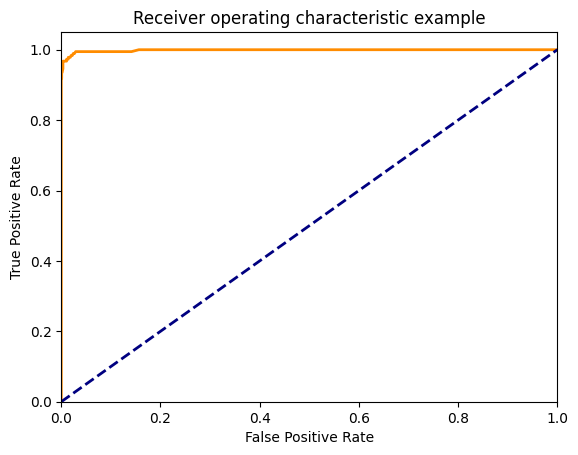

0.9351351351351351

In [ ]:
# Function for calculating auc and roc

def build_roc_auc(model, X_train, X_test, y_train, y_test):
    '''
    INPUT:
    model - an sklearn instantiated model
    X_train - the training data
    y_train - the training response values (must be categorical)
    X_test - the test data
    y_test - the test response values (must be categorical)
    OUTPUT:
    auc - returns auc as a float
    prints the roc curve
    '''
    import numpy as np
    import matplotlib.pyplot as plt
    from itertools import cycle
    from sklearn.metrics import roc_curve, auc, roc_auc_score
    from scipy import interp

    y_preds = model.fit(X_train, y_train).predict_proba(X_test)
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(y_test)):
        fpr[i], tpr[i], _ = roc_curve(y_test, y_preds[:, 1])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_preds[:, 1].ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    plt.plot(fpr[2], tpr[2], color='darkorange',
             lw=2, label='ROC curve (area = %0.2f)' % roc_auc[2])
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.show()

    return roc_auc_score(y_test, np.round(y_preds[:, 1]))


# Finding roc and auc for the random forest model
build_roc_auc(rf_mod, training_data, testing_data, y_train, y_test)

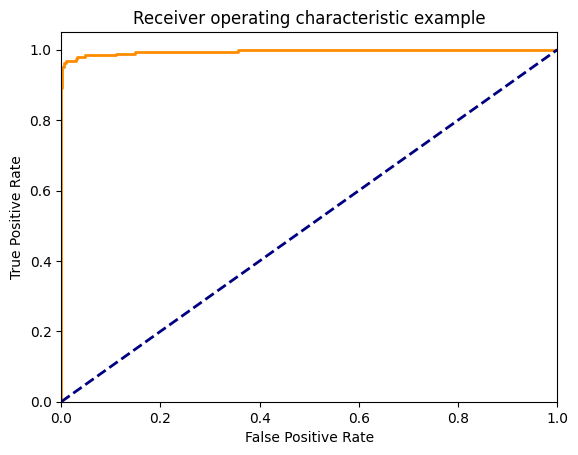

0.969442455700734

In [ ]:
build_roc_auc(svm_mod, training_data, testing_data, y_train, y_test)

naive_bayes = MultinomialNB()
bag_mod = BaggingClassifier(n_estimators=200)
rf_mod = RandomForestClassifier(n_estimators=200)
ada_mod = AdaBoostClassifier(n_estimators=300, learning_rate=0.2)
svm_mod = SVC(probability=True)

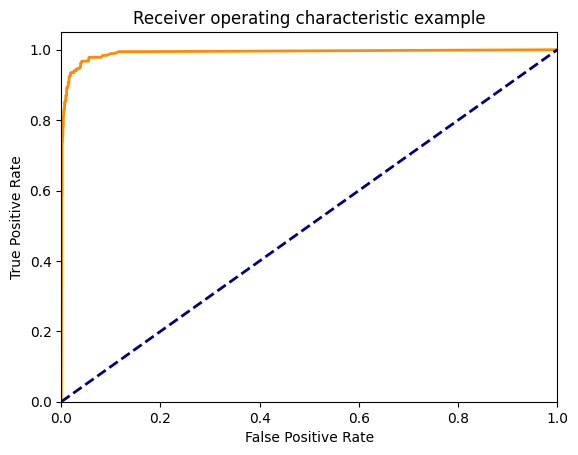

0.9393234293896546

In [ ]:
build_roc_auc(bag_mod, training_data, testing_data, y_train, y_test)

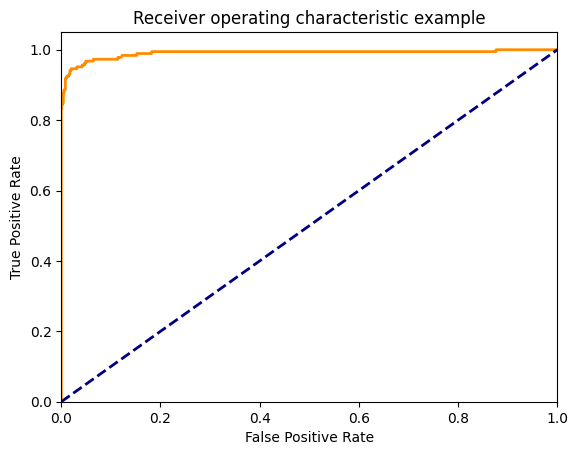

0.9249574906031861

In [ ]:
build_roc_auc(ada_mod, training_data, testing_data, y_train, y_test)

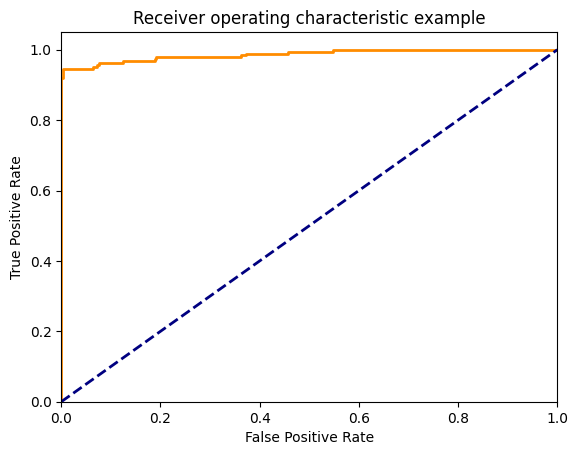

0.9682007338464294

In [ ]:
build_roc_auc(naive_bayes, training_data, testing_data, y_train, y_test)